# Data Preprocessing
Data preprocessing dalam klasifikasi hoax pilpres adalah tahapan kritis dalam analisis data yang bertujuan untuk membersihkan dan mempersiapkan data yang akan digunakan dalam pembuatan model klasifikasi. Proses ini melibatkan langkah-langkah seperti deteksi dan penanganan nilai yang hilang, normalisasi teks, penghapusan kata-kata kunci, serta pengubahan data teks menjadi representasi numerik. Dengan melakukan preprocessing, kita dapat meningkatkan kualitas data dan memastikan bahwa model klasifikasi yang akan dibangun dapat bekerja dengan efektif untuk mengidentifikasi berita palsu atau hoaks terkait pilpres.

## Library yang digunakan

In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
# untuk manipulasi data
import pandas as pd

# visualisasi data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

# data text manipulasi
import re

# filter stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

## Hubungkan dengan drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cek masing masing dataset

### Dataset 1

In [ ]:
# load dataset1
df_news1 = pd.read_csv('/content/drive/MyDrive/Indonesia_ai/Hoax/data/data_berita.csv')
df_news1.head()

,Judul Artikel,Link,Waktu_Scraping,Berita_Hoax
0,IDI: Kematian Petugas KPPS PEMILU 2019 Bukan K...,https://turnbackhoax.id/2023/09/28/salah-idi-k...,2023-10-13,True
1,“SKENARIO PEMILU 2024 adalah HARUS/BAKAL CURANG”,https://turnbackhoax.id/2023/08/01/salah-skena...,2023-10-13,True
2,Partai Komunis Cina Biayai Kampanye Ganjar Seb...,https://turnbackhoax.id/2023/07/19/salah-parta...,2023-10-13,True
3,PKB dan Gerindra Bersatu Dukung Anies Baswedan...,https://turnbackhoax.id/2023/06/27/salah-pkb-d...,2023-10-13,True
4,Video TVOne Siarkan Jokowi akan Maju jadi Cawa...,https://turnbackhoax.id/2023/06/27/salah-video...,2023-10-13,True


In [ ]:
df_news1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5549 entries, 0 to 5548
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Judul Artikel   5549 non-null   object
 1   Link            5549 non-null   object
 2   Waktu_Scraping  5549 non-null   object
 3   Berita_Hoax     5549 non-null   bool  
dtypes: bool(1), object(3)
memory usage: 135.6+ KB


Berdasarkan informasi diatas dapat kita ketahui bahwa dataset1 ini tidak terdapat <b>nilai missing value</b>, dan berisi <b>5549 data</b>

In [ ]:
df_news1['Berita_Hoax'].value_counts()

False    3650
True     1899
Name: Berita_Hoax, dtype: int64

Dataset1 ini berisikan <b>3650 berita Fakta</b> dan <b>1899 berita Hoax</b>

### Dataset 2

In [ ]:
# load dataset2
df_news2 = pd.read_excel('/content/drive/MyDrive/Indonesia_ai/Hoax/data/dataset_turnbackhoax_10k.xlsx')
df_news2.head()

,Title,Timestamp,FullText,Tags,Author,Url
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...


In [ ]:
# menyeragamkan judul kolom
df_news2['Berita_Hoax'] = True
df_news2 = df_news2.rename(columns={'Title': 'Judul Artikel'})
df_news2.head()

,Judul Artikel,Timestamp,FullText,Tags,Author,Url,Berita_Hoax
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,True
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,True
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,True
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,True
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,True


In [ ]:
df_news2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Judul Artikel  10383 non-null  object
 1   Timestamp      10384 non-null  object
 2   FullText       10382 non-null  object
 3   Tags           10384 non-null  object
 4   Author         10384 non-null  object
 5   Url            10384 non-null  object
 6   Berita_Hoax    10384 non-null  bool  
dtypes: bool(1), object(6)
memory usage: 497.0+ KB


Berdasarkan informasi diatas dapat kita ketahui bahwa dataset2 ini terdapat <b>1 missing value pada Judul artikel dan 2 missing value pada FullText</b>, dan berisi <b>10383 data</b>

In [ ]:
df_news2['Berita_Hoax'].value_counts()

True    10384
Name: Berita_Hoax, dtype: int64

Dataset2 merupakan dataset yang memang dikhususkan untuk menampung data <b>berita Hoaks</b>

### Dataset 3

In [ ]:
# load dataset3
df_news3 = pd.read_excel('/content/drive/MyDrive/Indonesia_ai/Hoax/data/dataset_cnn_10k.xlsx')
df_news3.head()

,Title,Timestamp,FullText,Tags,Author,Url
0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,"Selasa, 21 Feb 2023 21:22 WIB","Jakarta, CNN Indonesia -- Mantan Gubernur DKI ...",anies baswedan;pengajian;pilpres 2024;badan ko...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...
1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,"Selasa, 21 Feb 2023 20:46 WIB","Medan, CNN Indonesia -- Gubernur Sumatera Utar...",edy rahmayadi;pemilu 2024;pilkada 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...
2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,"Selasa, 21 Feb 2023 20:33 WIB","Jakarta, CNN Indonesia -- Partai Kebangkitan B...",ida fauziyah;pkb;pemilu 2024;pileg 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...
3,Gede Pasek Doakan AHY Jadi Capres atau Cawapres,"Selasa, 21 Feb 2023 19:58 WIB","Jakarta, CNN Indonesia -- Ketua Umum Partai Ke...",gede pasek suardika;ahy;pilpres 2024;pemilu 20...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...
4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,"Selasa, 21 Feb 2023 18:56 WIB","Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...",anas urbaningrum;pkn;pemilu 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...


In [ ]:
# menyeragamkan judul kolom
df_news3['Berita_Hoax'] = False
df_news3 = df_news3.rename(columns={'Title': 'Judul Artikel'})
df_news3.head()

,Judul Artikel,Timestamp,FullText,Tags,Author,Url,Berita_Hoax
0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,"Selasa, 21 Feb 2023 21:22 WIB","Jakarta, CNN Indonesia -- Mantan Gubernur DKI ...",anies baswedan;pengajian;pilpres 2024;badan ko...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,False
1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,"Selasa, 21 Feb 2023 20:46 WIB","Medan, CNN Indonesia -- Gubernur Sumatera Utar...",edy rahmayadi;pemilu 2024;pilkada 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,False
2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,"Selasa, 21 Feb 2023 20:33 WIB","Jakarta, CNN Indonesia -- Partai Kebangkitan B...",ida fauziyah;pkb;pemilu 2024;pileg 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,False
3,Gede Pasek Doakan AHY Jadi Capres atau Cawapres,"Selasa, 21 Feb 2023 19:58 WIB","Jakarta, CNN Indonesia -- Ketua Umum Partai Ke...",gede pasek suardika;ahy;pilpres 2024;pemilu 20...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,False
4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,"Selasa, 21 Feb 2023 18:56 WIB","Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...",anas urbaningrum;pkn;pemilu 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,False


In [ ]:
df_news3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Judul Artikel  10000 non-null  object
 1   Timestamp      10000 non-null  object
 2   FullText       9630 non-null   object
 3   Tags           9997 non-null   object
 4   Author         10000 non-null  object
 5   Url            10000 non-null  object
 6   Berita_Hoax    10000 non-null  bool  
dtypes: bool(1), object(6)
memory usage: 478.6+ KB


Berdasarkan informasi diatas dapat kita ketahui bahwa dataset3 ini terdapat <b>370 missing value pada FullText dan 3 missing value pada Tags</b>, dan berisi <b>10000 data</b>

In [ ]:
df_news3['Berita_Hoax'].value_counts()

False    10000
Name: Berita_Hoax, dtype: int64

Dataset3 merupakan dataset yang memang dikhususkan untuk menampung data <b>berita Fakta</b>

## memilih fitur yang akan digunakan

In [ ]:
# mengambil kolom yang akan digunakan
'''
karena case ini untuk mengklasifikasikan judul berita
apakah termasuk hoax atau bukan maka hanya menggunakan
kolom Judul Artikel dan Berita_Hoax
'''
df_news1 = df_news1[['Judul Artikel', 'Berita_Hoax']]
df_news2 = df_news2[['Judul Artikel', 'Berita_Hoax']]
df_news3 = df_news3[['Judul Artikel', 'Berita_Hoax']]

In [ ]:
# menggabungkan semua dataset
'''
Dikarenakan kita mempunyai 3 dataset maka semua
dataset tersebut harus kita satukan menjadi 1
'''
result_df = pd.concat([df_news1, df_news2, df_news3], ignore_index=True)
result_df.head()

,Judul Artikel,Berita_Hoax
0,IDI: Kematian Petugas KPPS PEMILU 2019 Bukan K...,True
1,“SKENARIO PEMILU 2024 adalah HARUS/BAKAL CURANG”,True
2,Partai Komunis Cina Biayai Kampanye Ganjar Seb...,True
3,PKB dan Gerindra Bersatu Dukung Anies Baswedan...,True
4,Video TVOne Siarkan Jokowi akan Maju jadi Cawa...,True


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25933 entries, 0 to 25932
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Judul Artikel  25932 non-null  object
 1   Berita_Hoax    25933 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 228.1+ KB


Sehingga sekarang dataset kita terdiri dari <b>25933 data</b> dan <b>terdapat 1 missing value di Judul artikel</b>

In [ ]:
# menampilkan berapa banyak null
result_df.isnull().sum()

Judul Artikel    1
Berita_Hoax      0
dtype: int64

In [ ]:
# melihat baris yang null
null_row = result_df[result_df.isna().any(axis=1)]
null_row

,Judul Artikel,Berita_Hoax
15709,NaN,True


In [ ]:
#menghapus nilai missing value
result_df = result_df.dropna()

In [ ]:
'''
Kita cek kembali apakah sudah benar terhapus nilai missing nya
'''
result_df.isnull().sum()

Judul Artikel    0
Berita_Hoax      0
dtype: int64

In [ ]:
# mengubah nilai agar lebih sesuai
def ubah_nilai(kolom):
    result_df[kolom] = result_df[kolom].map({True: 'Hoax', False: 'Fakta'})
    return result_df

result_df = ubah_nilai('Berita_Hoax')

In [ ]:
result_df['Berita_Hoax'].value_counts()

Fakta    13650
Hoax     12282
Name: Berita_Hoax, dtype: int64

Dataset kita sekarang berisikan <b>13650 berita Fakta</b> dan <b>12282 berita Hoax</b>

## fungsi untuk preprosessing data

In [ ]:
# fungsi untuk preprosessing
def text_preprosesing(text):
    # filtering karakter selain huruf dan spasi, lalu lakukan lower case
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', str(text)).lower()
    #stemming
    stem = stemmer.stem(cleaned_text)
    # filter stopword
    cleaned_text = stopword_remover.remove(stem)
    # hapus double spasi
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    # hapus tab
    cleaned_text = re.sub(r'\t', ' ', cleaned_text)

    return cleaned_text

In [ ]:
# daftar substing yang akan dihapus
substrings = ['klarifikasi','disinformasi','salah',
              'edukasi','hoax','benar','gambar']

In [ ]:
# Fungsi untuk menghapus substrings
def remove_substrings(text):
    pattern = '|'.join(map(re.escape, substrings))
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text.strip()

## menerapkan fungsi yang telah dibuat

In [ ]:
result_df['Judul Artikel'] = result_df['Judul Artikel'].apply(text_preprosesing)

In [ ]:
result_df['Judul Artikel'] = result_df['Judul Artikel'].apply(remove_substrings)

In [ ]:
result_df.head()

,Judul Artikel,Berita_Hoax
0,idi mati tugas kpps milu bukan lelah karena racun,Hoax
1,skenario milu harus bakal curang,Hoax
2,partai komunis cina biaya kampanye ganjar besa...,Hoax
3,pkb gerindra satu dukung anies baswedan milu,Hoax
4,video tvone siar jokowi maju jadi cawapres milu,Hoax


## menyimpan dataset yang sudah bersih

In [ ]:
result_df.to_csv('./data/data_bersih.csv', index=False)

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) adalah suatu pendekatan analisis data yang bertujuan untuk memahami karakteristik dan pola dalam data secara lebih mendalam sebelum melakukan pemodelan atau pengambilan keputusan. Dalam konteks klasifikasi hoax pilpres, EDA dapat membantu mengidentifikasi faktor-faktor yang berkaitan dengan penyebaran atau penyebaran informasi palsu seputar pemilihan umum presiden.

In [ ]:
# Fungsi untuk hitung huruf
def count_word(text):
    #split teks menjadi kata-kata
    words = text.split()

    #hitung frekuensi masing-masing kata
    word_freq = Counter(words)

    #membuat dataFrame dari frekuensi kata
    word_freq_df = pd.DataFrame(word_freq.items(), columns=['Kata', 'Frekuensi'])

    #menyusun frekuensi kata tertinggi
    word_freq_df = word_freq_df.sort_values(by='Frekuensi', ascending=False)

    return word_freq_df

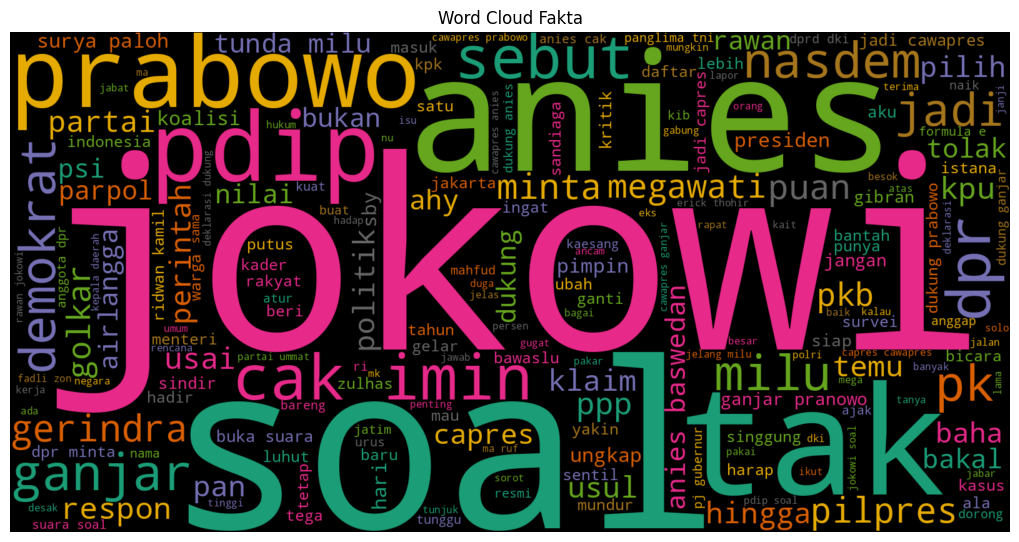

In [ ]:
#worldcloud Hoax
data_fakta = result_df.loc[(result_df['Berita_Hoax'] == 'Fakta')]
word_fakta = pd.Series(' '.join(data_fakta['Judul Artikel']).split())
text_fakta = ' '.join(word_fakta)

# Display the generated image:
wordcloud_fakta = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text_fakta)
plt.figure(figsize=(10,10))
plt.title('Word Cloud Fakta')
plt.imshow(wordcloud_fakta, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Berdasarkan data **Jokowi** masih menjadi topik yang sering dibicarakan walaupun sudah mendekati akhir masa jabatannya. Disusul oleh **Anies**, **Prabowo**, dan **Ganjar** yang merupakan Calon Presiden periode berikutnya.

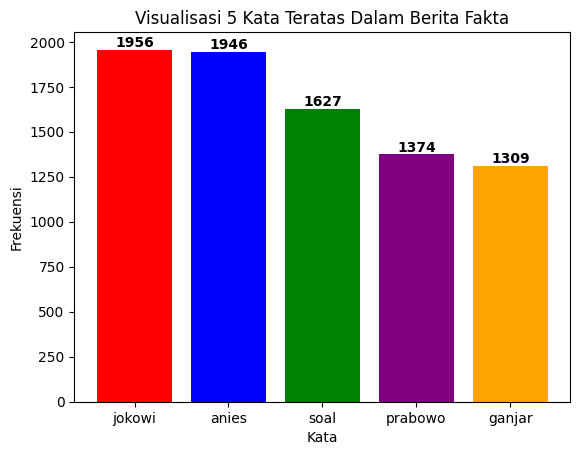

In [ ]:
#cek frekuesin kata
freq_fakta = count_word(text_fakta)

# Mengambil 5 data teratas
top5_data = freq_fakta.head()

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(top5_data['Kata'], top5_data['Frekuensi'], color=['red', 'blue', 'green', 'purple', 'orange'])

# Memberikan label pada sumbu x dan y
ax.set_xlabel('Kata')
ax.set_ylabel('Frekuensi')
ax.set_title('Visualisasi 5 Kata Teratas Dalam Berita Fakta')

# Menambahkan label pada tiap bar
for bar, label in zip(bars, top5_data['Frekuensi']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(label, 2), ha='center', va='bottom', color='black', fontweight='bold')

# Menampilkan plot
plt.show()

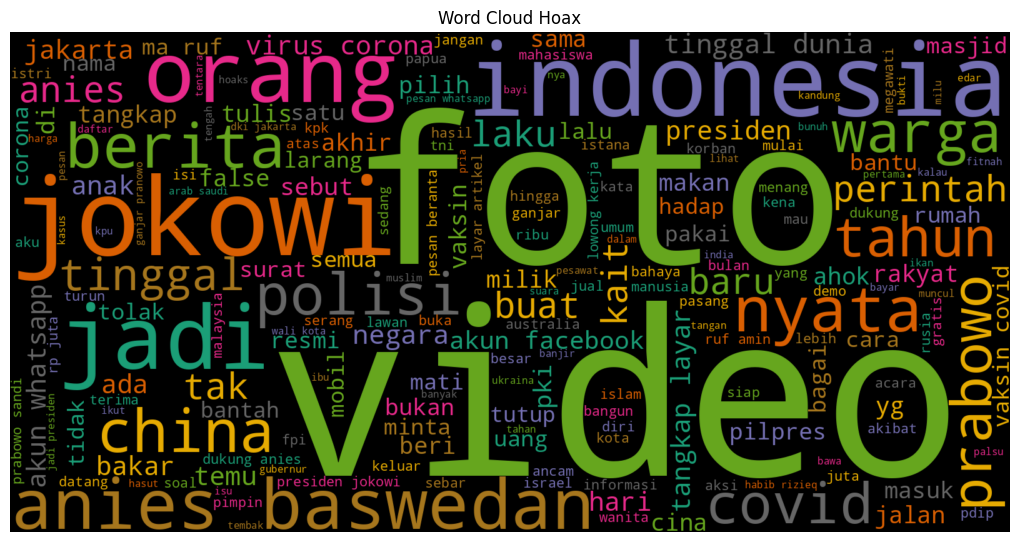

In [ ]:
#worldcloud hoax
data_hoax = result_df.loc[(result_df['Berita_Hoax'] == 'Hoax')]
word_hoax = pd.Series(' '.join(data_hoax['Judul Artikel']).split())
text_hoax = ' '.join(word_hoax)

# Display the generated image:
wordcloud_hoax = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text_hoax)
plt.figure(figsize=(10,10))
plt.title('Word Cloud Hoax')
plt.imshow(wordcloud_hoax, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Subjek Hoax berdasarkan data ini lebih sering membicarakan **Jokowi** dan **Anies**, Objek Hoax yang dibicarakan tentang **Foto** dan **Video**.

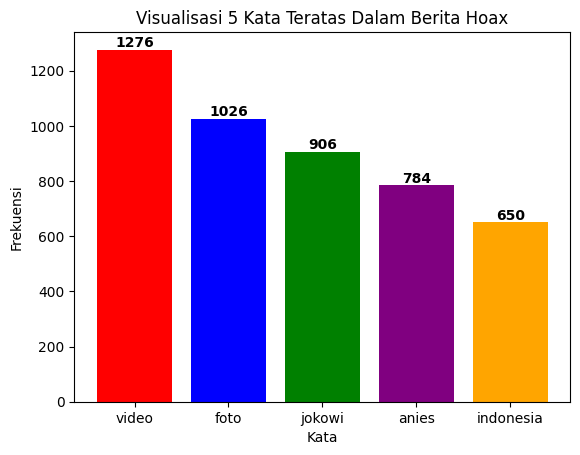

In [ ]:
#cek frekuesin kata
freq_fakta = count_word(text_hoax)

# Mengambil 5 data teratas
top5_data = freq_fakta.head()

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(top5_data['Kata'], top5_data['Frekuensi'], color=['red', 'blue', 'green', 'purple', 'orange'])

# Memberikan label pada sumbu x dan y
ax.set_xlabel('Kata')
ax.set_ylabel('Frekuensi')
ax.set_title('Visualisasi 5 Kata Teratas Dalam Berita Hoax')

# Menambahkan label pada tiap bar
for bar, label in zip(bars, top5_data['Frekuensi']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(label, 2), ha='center', va='bottom', color='black', fontweight='bold')

# Menampilkan plot
plt.show()